In [3]:
%load_ext autoreload
%autoreload 2
notebook_fixed_dir = False

In [4]:
# this cell can only be called once
import os
if not notebook_fixed_dir:
    os.chdir('..')
    notebook_fixed_dir = True
print(os.getcwd())

/home/svcl-oowl/brandon/research/sil_consistent_at_inference


In [22]:
import pprint
import pickle
import glob
import random

import torch
from tqdm import tqdm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from utils import utils

real_dataset_dir==========================================================
data/semantic_dis/real_renders/48091b14719964986d075d8d4fe1141_model_3.jpg


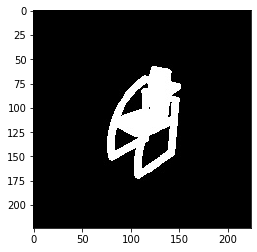

data/semantic_dis/real_renders/27680e1b7951526518694a7306254063_model_1.jpg


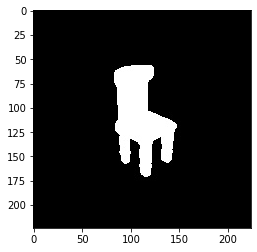

data/semantic_dis/real_renders/f3955fc72bd9f91e30e06a011e63236a_model_3.jpg


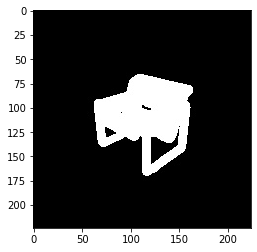

data/semantic_dis/real_renders/ebc5bd5566558b64af7c7ad2549a1b15_model_4.jpg


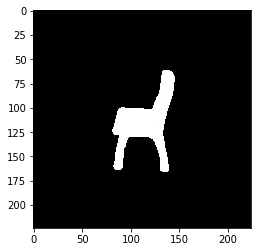

data/semantic_dis/real_renders/41896e1532fe1e63bda72093f9b5aa73_model_6.jpg


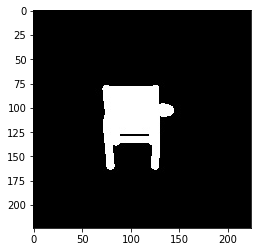

data/semantic_dis/real_renders/b4827a7b42d68aadbeab82a04eef83b6_model_0.jpg


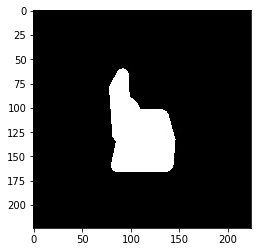

data/semantic_dis/real_renders/1be38f2624022098f71e06115e9c3b3e_model_2.jpg


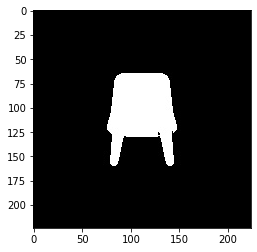

data/semantic_dis/real_renders/d7d709cd13cdca931afedc87fe387fe_model_4.jpg


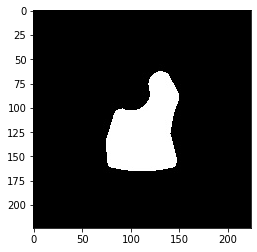

data/semantic_dis/real_renders/546c4449b8001f0815d1fabef5f236ab_model_7.jpg


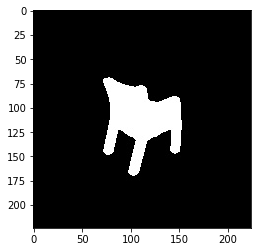

data/semantic_dis/real_renders/605ebc9107c71d54d8f5adb469ca89d3_model_5.jpg


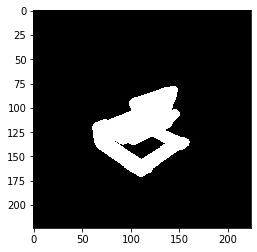

fake_dataset_dir==========================================================
data/semantic_dis/fake_renders/batch_1_of_5_0558_1.jpg


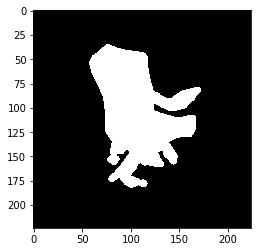

data/semantic_dis/fake_renders/batch_3_of_5_2260_1.jpg


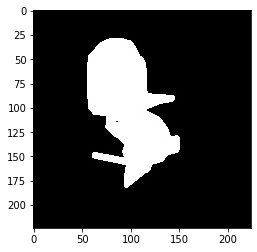

data/semantic_dis/fake_renders/batch_5_of_5_3356_7.jpg


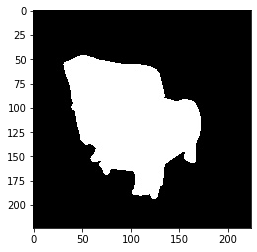

data/semantic_dis/fake_renders/batch_1_of_5_0291_6.jpg


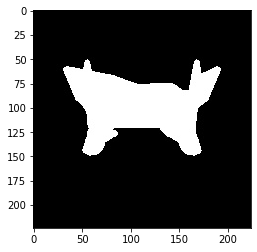

data/semantic_dis/fake_renders/batch_2_of_5_1273_7.jpg


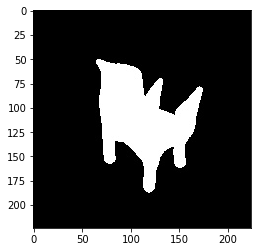

data/semantic_dis/fake_renders/batch_4_of_5_2931_0.jpg


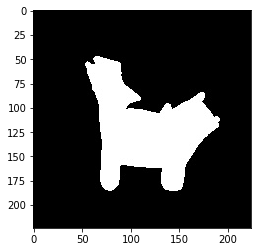

data/semantic_dis/fake_renders/batch_3_of_5_1710_5.jpg


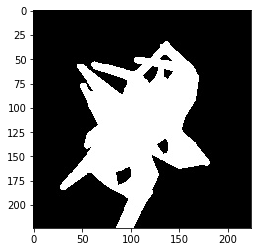

data/semantic_dis/fake_renders/batch_4_of_5_2861_3.jpg


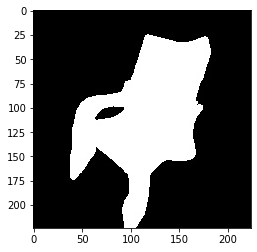

data/semantic_dis/fake_renders/batch_5_of_5_3288_7.jpg


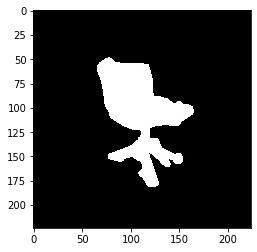

data/semantic_dis/fake_renders/batch_5_of_5_3518_0.jpg


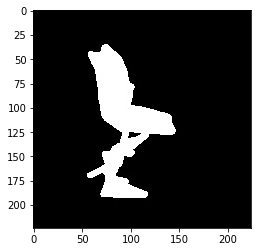

In [26]:
# show real and fake renders
cfg_path = "configs/default.yaml"
cfg = utils.load_config(cfg_path, "configs/default.yaml")

num_show = 10
for render_dir_type in ["real_dataset_dir", "fake_dataset_dir"]:
    print("{}==========================================================".format(render_dir_type))
    render_dir = os.path.join(cfg["semantic_dis_training"][render_dir_type])
    img_paths = glob.glob(os.path.join(render_dir, "*.jpg"))
    random.shuffle(img_paths)
    for img_path in img_paths[:num_show]:
        print(img_path)
        plt.imshow(cv2.imread(img_path))
        plt.show()
    


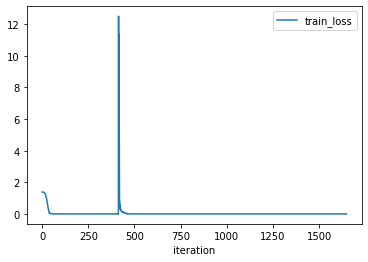

In [29]:
exp_name = "2020_08_22--04_19_21_semantic_discrim"
exp_dir = os.path.join("out", exp_name)
exp_training_info_path = os.path.join(exp_dir, "training_info.p")

exp_training_info = pickle.load(open(exp_training_info_path, "rb"))
exp_training_info['train'].plot.line(x="iteration", y="train_loss")
#exp_training_info['val'].plot.line(x="epoch", y="val_acc")

In [28]:
display(exp_training_info['val'])

,epoch,val_acc
0,0.0,0.996611
1,1.0,0.996872
